- the target contains (daily mean concentration)

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Datasets

In [2]:
ds = pd.read_csv("Train.csv")
ds.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prepocessing Data

##### Fixing DataTypes

In [3]:
ds = ds.drop("Place_ID X Date", axis = 1)

In [4]:
ds["Place_ID"].head()

0    010Q650
1    010Q650
2    010Q650
3    010Q650
4    010Q650
Name: Place_ID, dtype: object

In [5]:
ds["Place_ID"].unique()

array(['010Q650', '05EC30X', '0DPWHX8', '0GBXTHY', '0HYPV1N', '0I2XREH',
       '0KV6RJ1', '0MGEY68', '0O9R6AD', '0PP73FZ', '0RYZQUU', '0TFOCOS',
       '0TLH9UN', '11WPGRD', '168B2T2', '1GZGJPN', '1LC5FAK', '1PRBF5P',
       '1RYCZPT', '1SC5AWD', '1SKLTGJ', '1TE1HKJ', '1UEYEJQ', '1VN0K1S',
       '1WD100Y', '1X421B8', '1Y0S7TZ', '1YXF6T3', '1Z0FIHB', '1ZBVIMD',
       '215BUAP', '22D7H7I', '238N4KU', '28OSFYU', '2JZW8ZM', '2OR3E6X',
       '2S8UY1N', '2T41T7C', '2USU80I', '2WABRKJ', '35YN53B', '37VXILV',
       '3EJ33BJ', '3H1DEPM', '3HTVI1M', '3MXSVYJ', '3V177MC', '3WZQJU8',
       '4085G7L', '426FKUG', '431JQGO', '4EVR9T8', '4IVJPF2', '4WA4C0T',
       '4XP6UOX', '4ZMC9UQ', '50JFNAG', '57GIW0H', '5ETAG9S', '5I4TI4R',
       '5IOL334', '5IUK9TG', '5KE9R9R', '5M7ZX94', '5QYHA81', '5SXR1G0',
       '5YBO7PQ', '62HOUYZ', '693EWQR', '6CR3BYP', '6HXPCBH', '6J4AKCJ',
       '6KAHP8X', '6KHIOQ8', '6O56XQX', '6PWJJ6D', '6SJG8N2', '6TF1KNR',
       '6TLEFED', '6U70TX5', '73GXFXK', '7DRFQCK', 

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
# Looking for columns with object dtypes
s =(ds.dtypes == "object")
object_cols = list(s[s].index)
print(object_cols)

['Date', 'Place_ID']


In [8]:
# Changing Date from Object to Date
ds["Date"] = pd.to_datetime(ds["Date"], format="%Y-%m-%d")
ds["Date"]

0       2020-01-02
1       2020-01-03
2       2020-01-04
3       2020-01-05
4       2020-01-06
           ...    
30552   2020-03-15
30553   2020-03-16
30554   2020-03-17
30555   2020-03-18
30556   2020-03-19
Name: Date, Length: 30557, dtype: datetime64[ns]

In [9]:
# Updating columns with object dtypes
s =(ds.dtypes == "object")
object_cols = list(s[s].index)
print(object_cols)

['Place_ID']


In [10]:
# making copies of the dataset to avoid it from changing
dataset = ds.copy()

# Applying OrdinalEncoder to the Place_ID
ordinal_encoder = OrdinalEncoder()
dataset[object_cols] = ordinal_encoder.fit_transform(ds[object_cols])
dataset[object_cols] = ordinal_encoder.fit_transform(ds[object_cols])

In [11]:
dataset.head(100)

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,2020-01-02,0.0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.008040,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,2020-01-03,0.0,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.008390,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,2020-01-04,0.0,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.007500,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-05,0.0,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.003910,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-06,0.0,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.005350,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-01-03,1.0,38.0,9.0,147.0,13463.50,23,19.212500,47.487500,0.009418,...,63.662502,-65.751227,13.563679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2020-01-04,1.0,42.0,13.0,117.0,7694.33,24,16.762501,53.012501,0.009282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2020-01-05,1.0,30.0,21.0,74.0,1468.90,21,19.424448,72.412502,0.010766,...,19.950007,-82.714494,26.629273,1823.966917,3050.504689,0.012687,-100.053949,20.258321,-82.814026,26.658260
98,2020-01-06,1.0,21.0,17.0,95.0,6254.46,22,12.487500,20.075001,0.003499,...,13.922822,-78.636239,22.529734,1821.194625,2936.346165,0.028841,71.775694,13.972908,-78.672304,22.534981


##### Working on Missing Values

In [12]:
import missingno as msno

<Axes: >

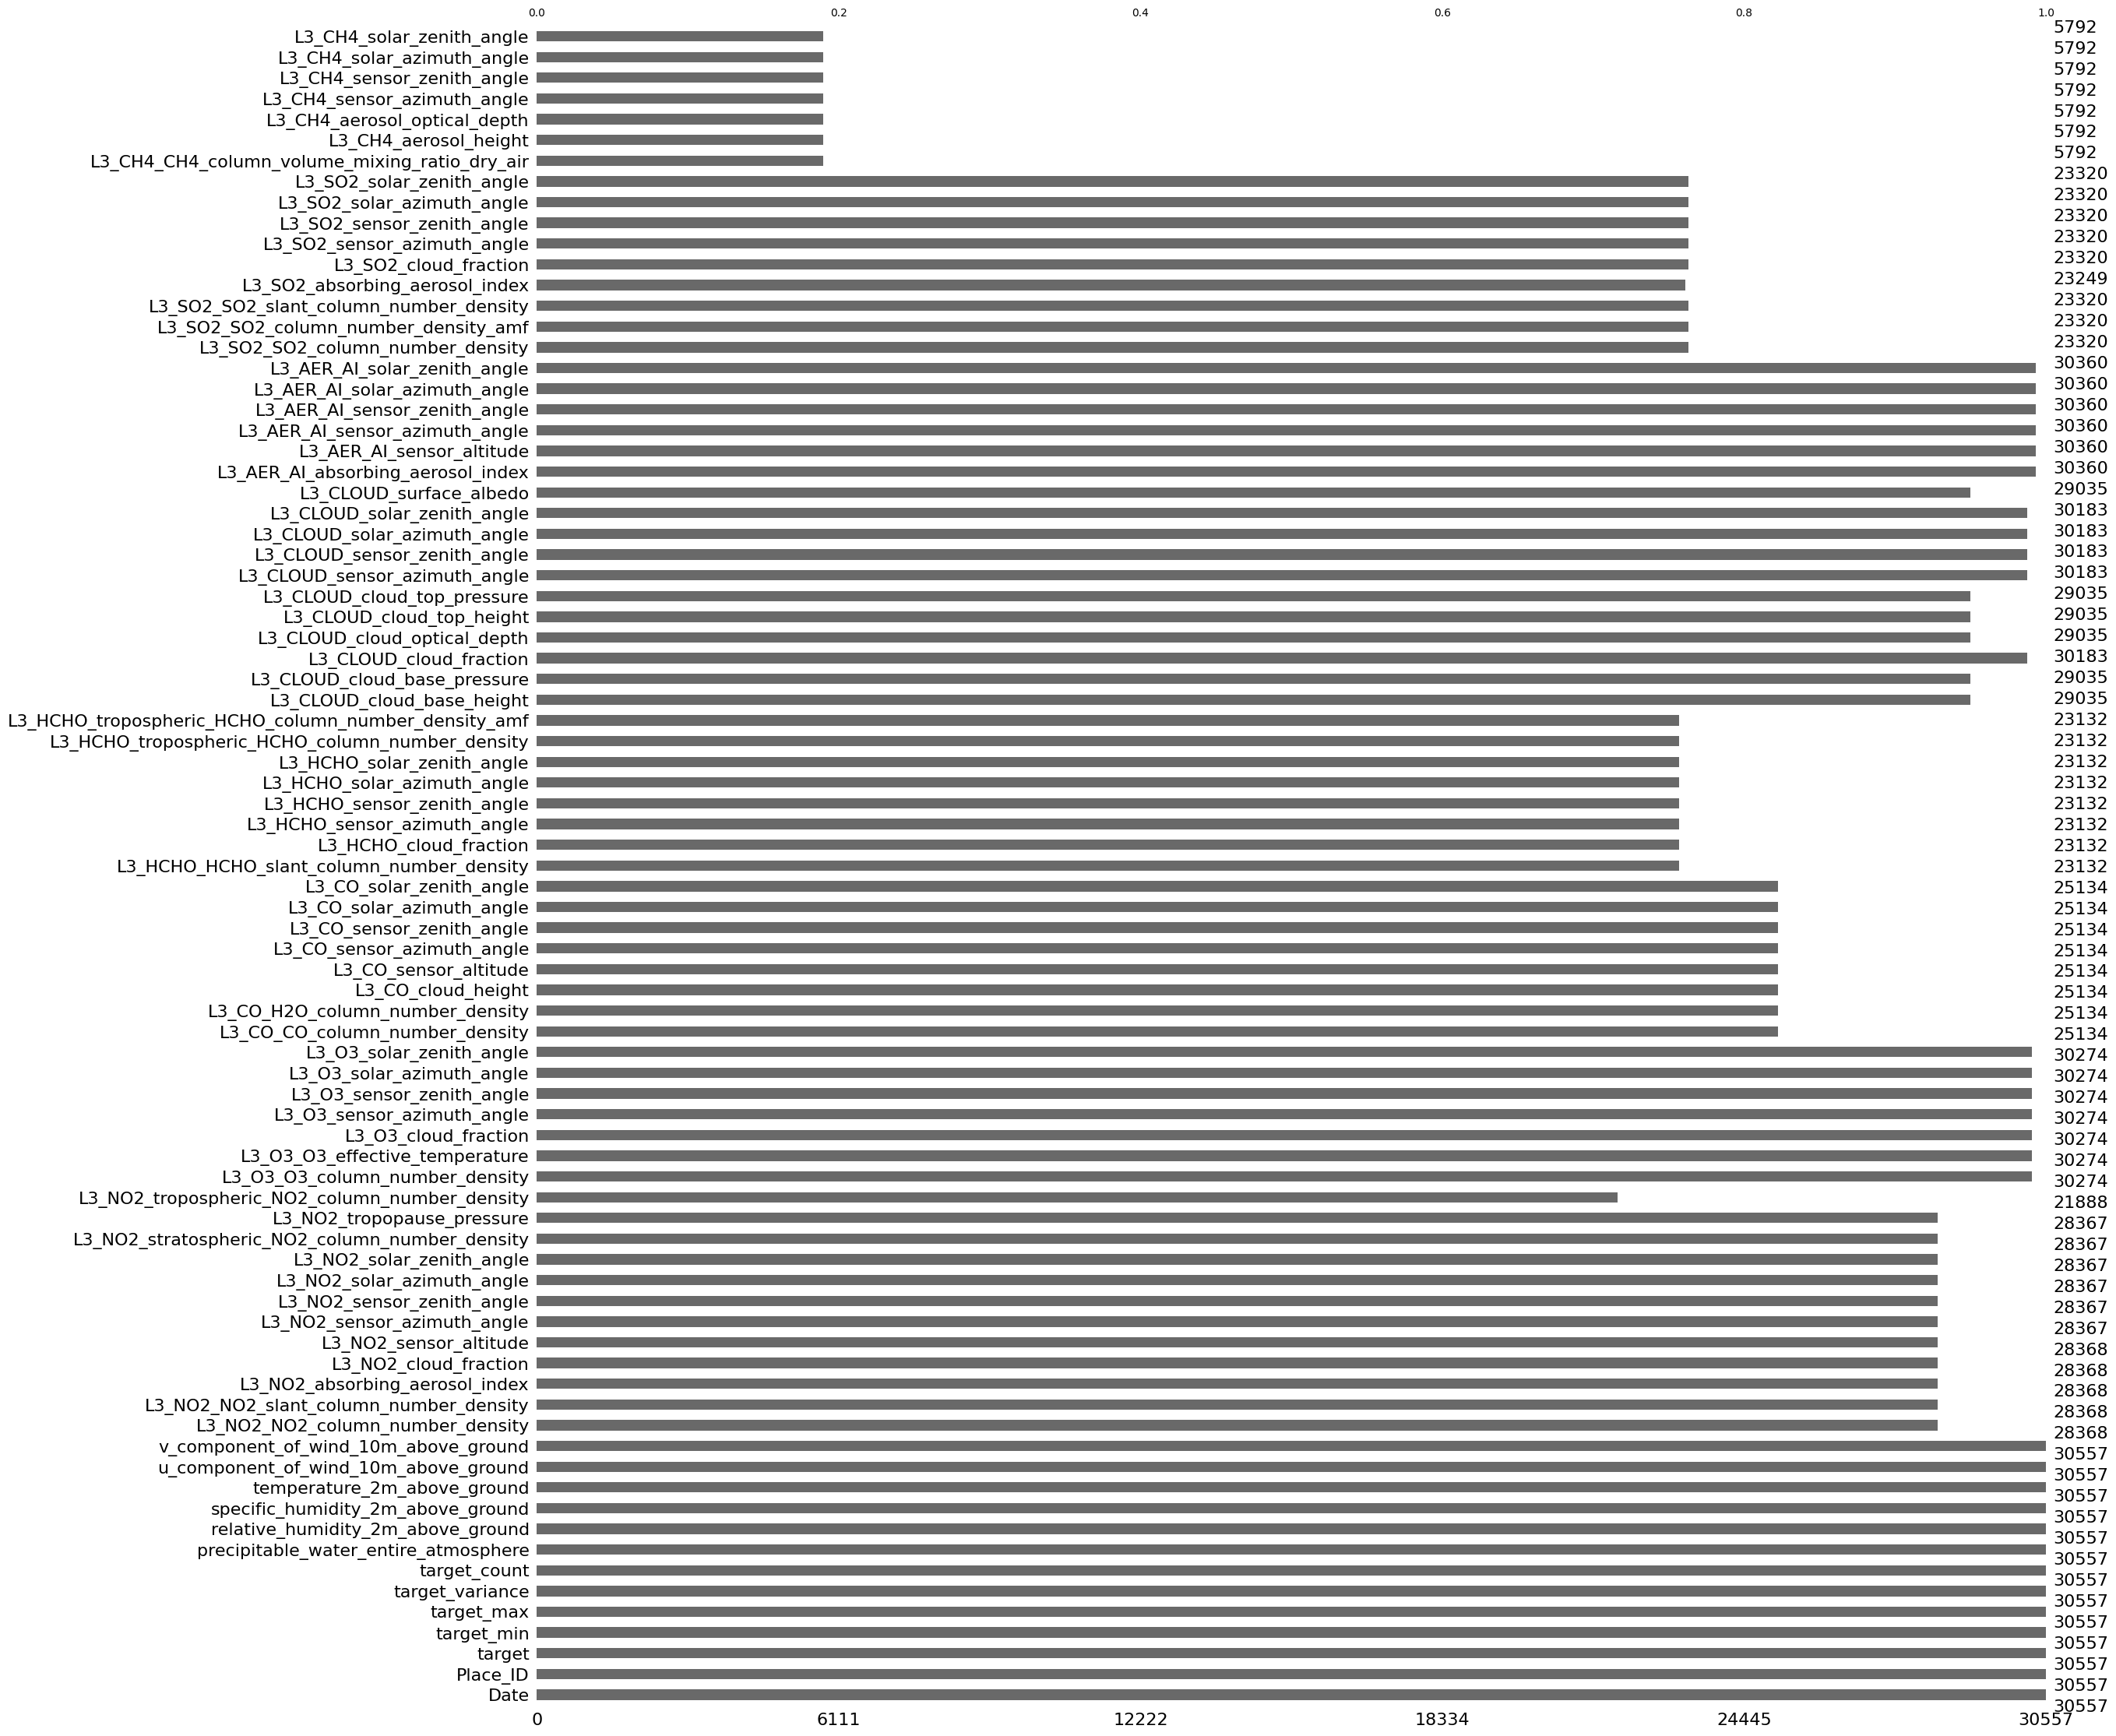

In [13]:
msno.bar(dataset)

In [14]:
dataset.describe()

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557,30557.000000,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,2020-02-17 11:32:35.807180032,169.324836,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
min,2020-01-02 00:00:00,0.000000,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,2020-01-25 00:00:00,85.000000,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,2020-02-17 00:00:00,169.000000,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-03-12 00:00:00,254.000000,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,2020-04-04 00:00:00,339.000000,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363
std,NaN,97.876791,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350


In [15]:
# Get names of columns with missing values
cols_with_missing = [col for col in ds.columns if ds[col].isnull().any()]
len(cols_with_missing)

68

In [22]:
### Getting 80% of 30557

limit = (0.8*30557)
int(limit)

24445

In [24]:
# Filling in null values
for col in cols_with_missing:
    if dataset[col].isnull().sum() < limit:
        dataset[col] = dataset[col].fillna(0)
    else:
        dataset[col] = dataset[col].fillna(dataset[col].fillna(dataset[col].mean()))

len([col for col in dataset.columns if dataset[col].isnull().any()])

0

<Axes: >

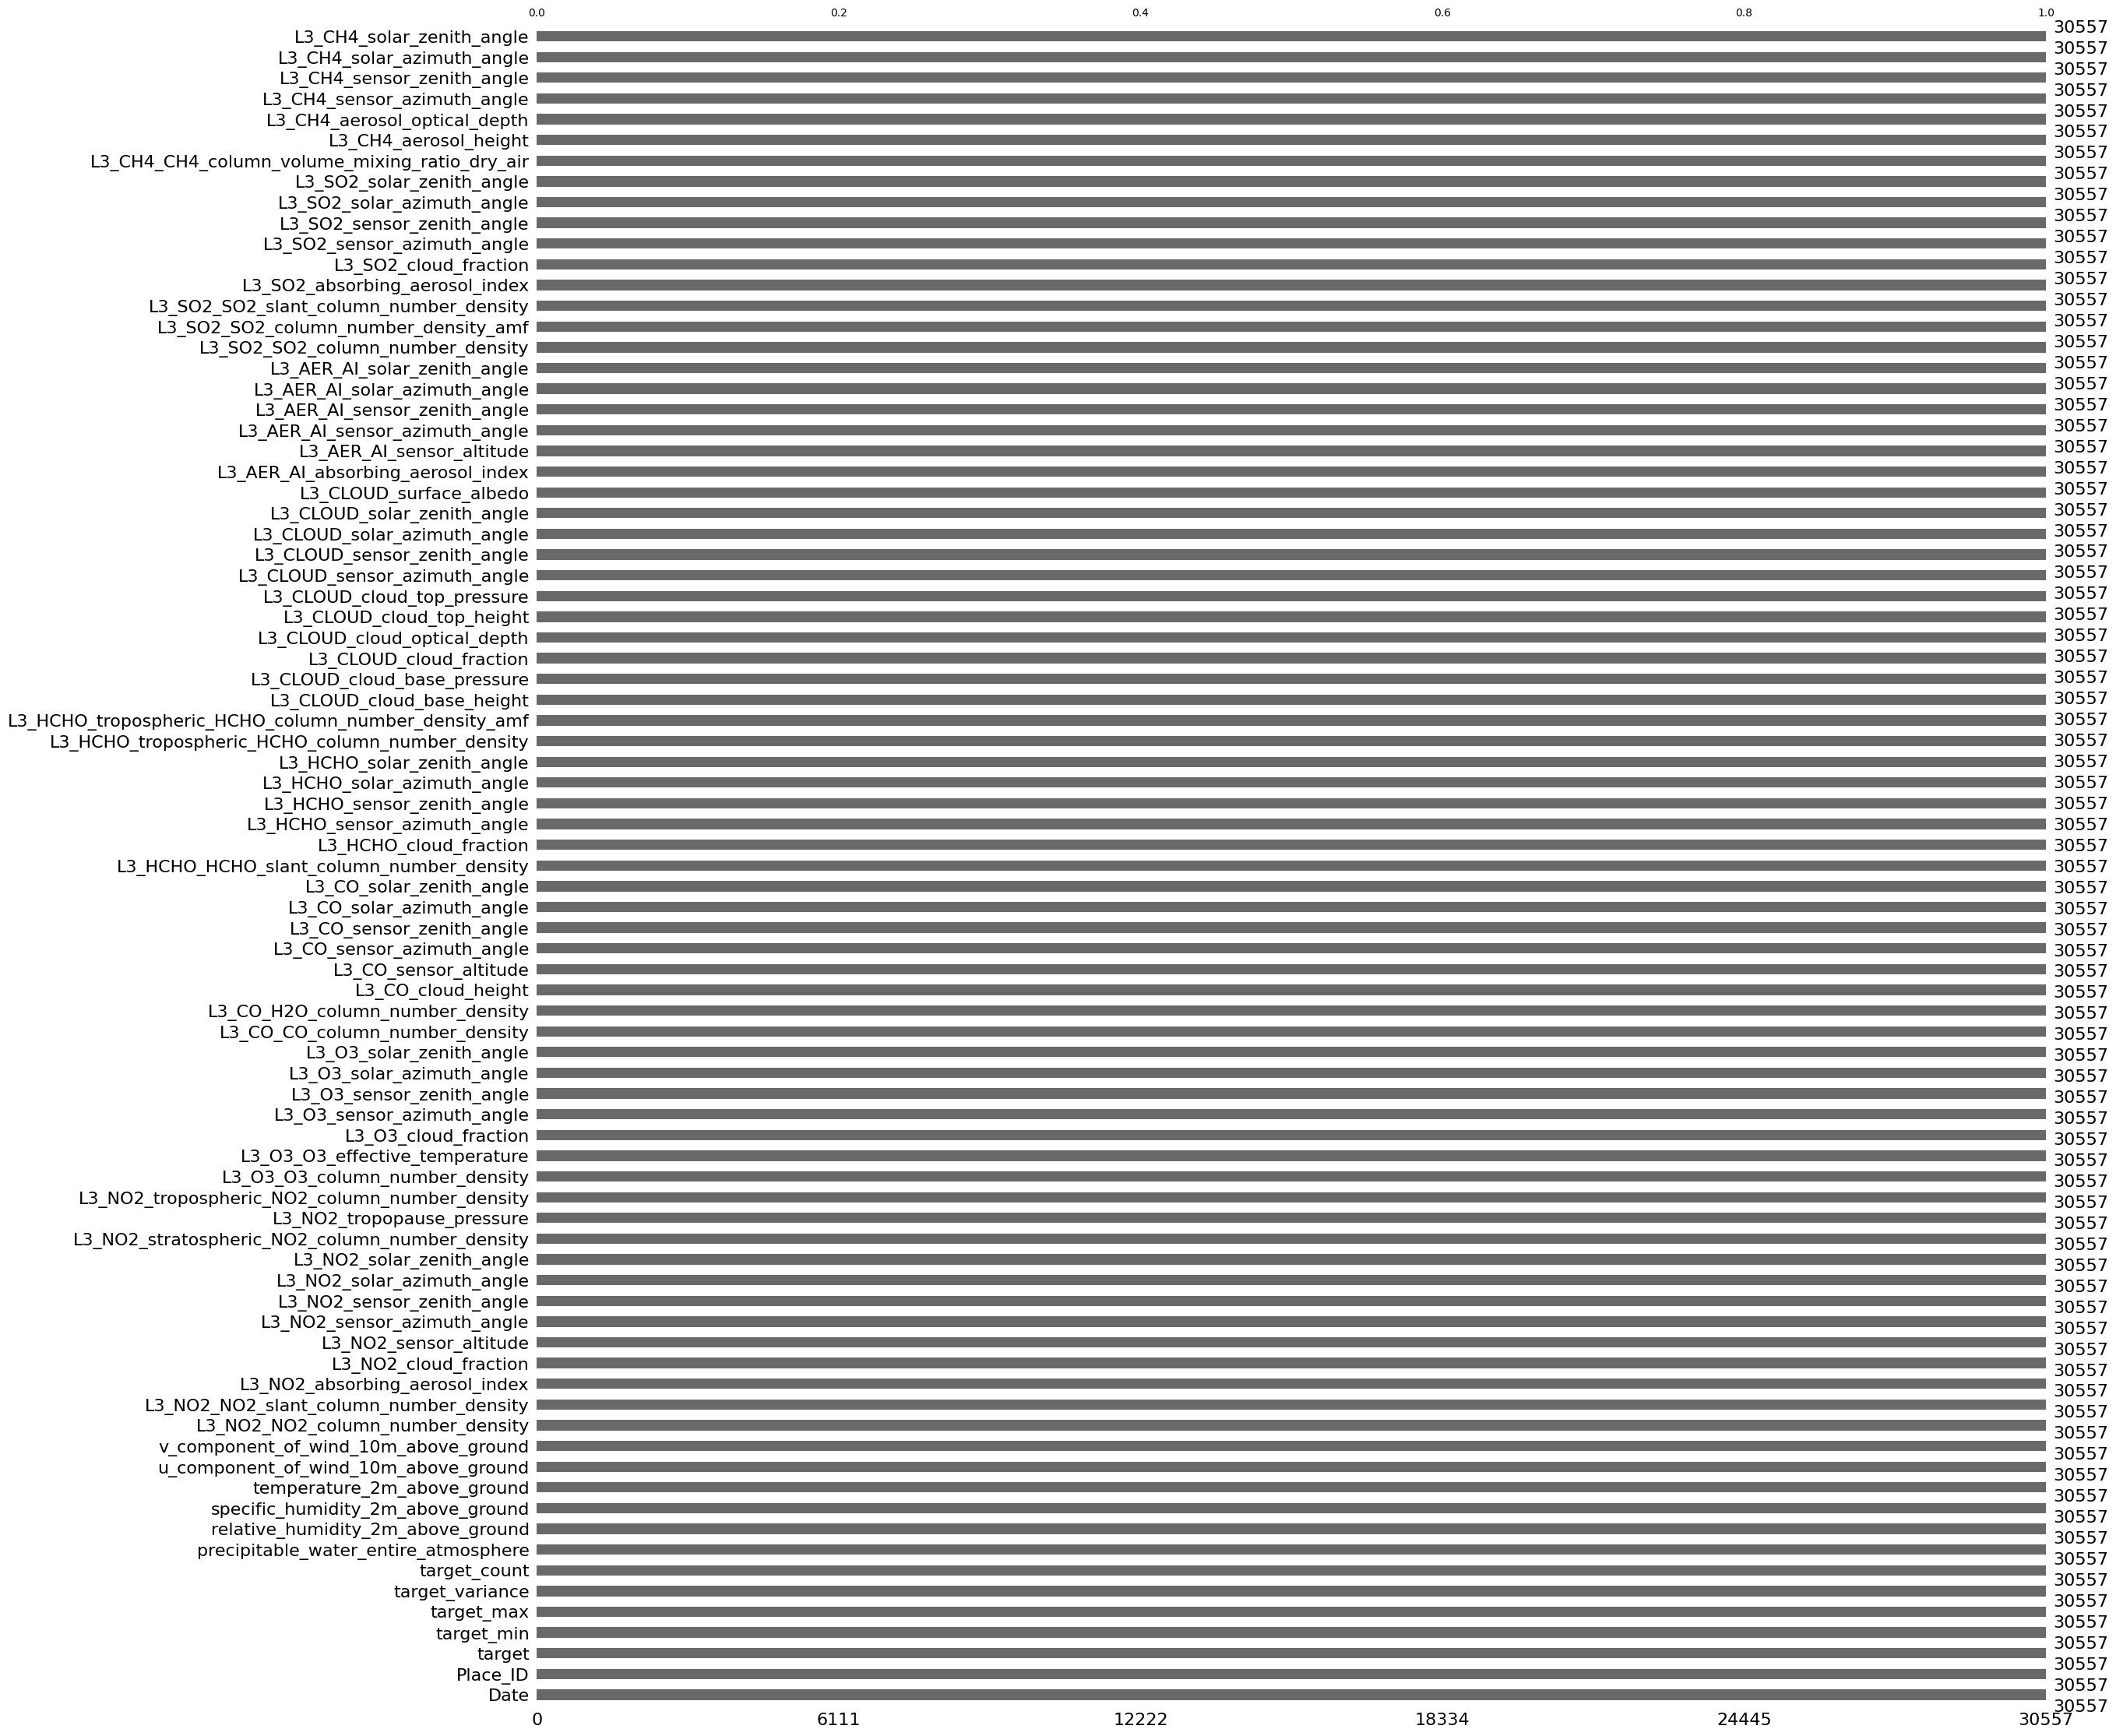

In [25]:
msno.bar(dataset)

##### Outliers

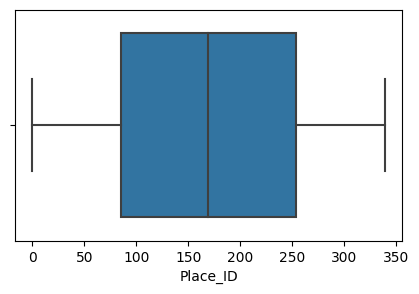

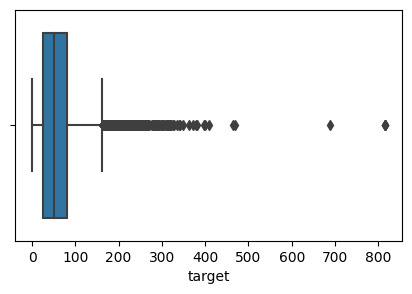

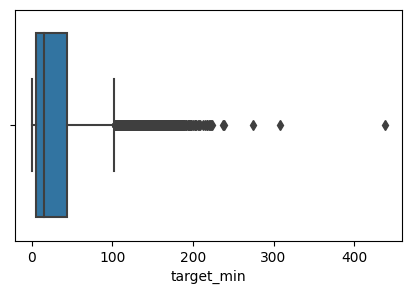

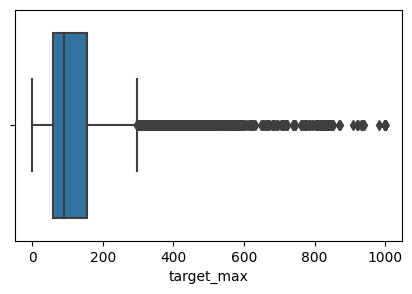

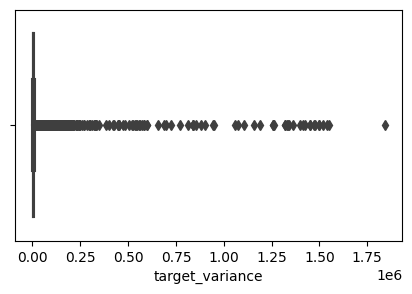

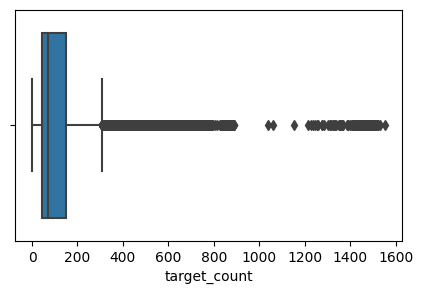

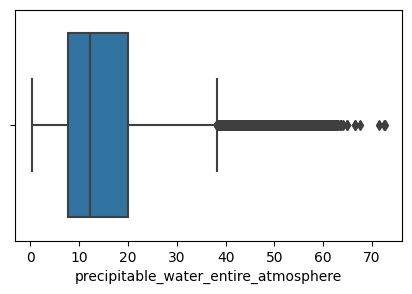

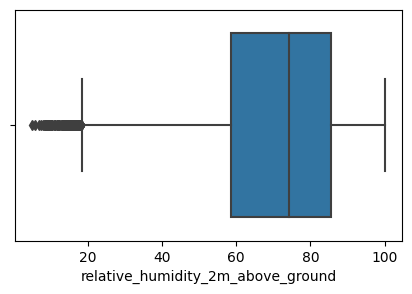

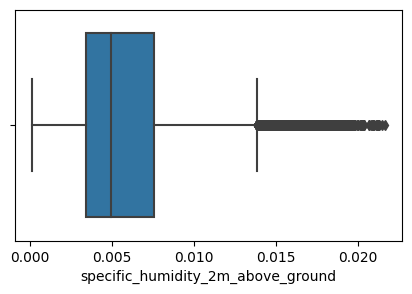

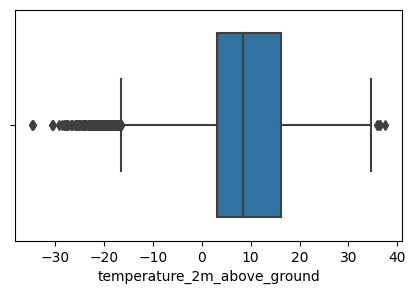

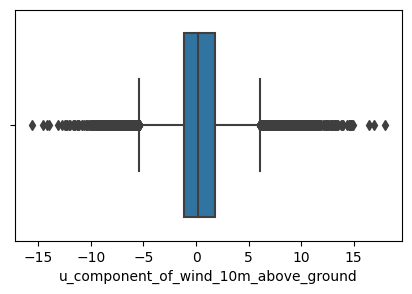

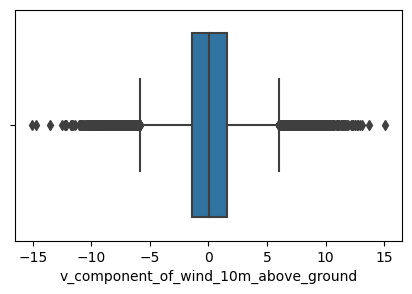

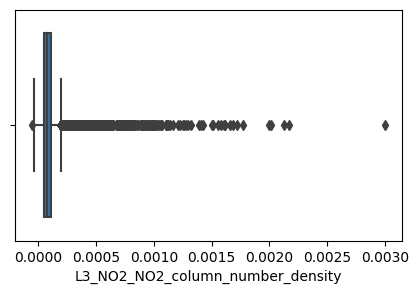

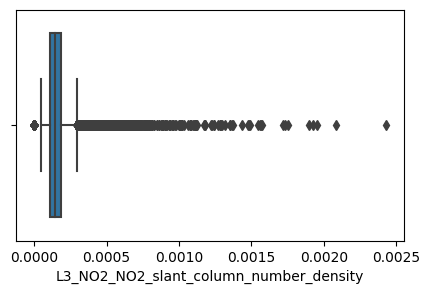

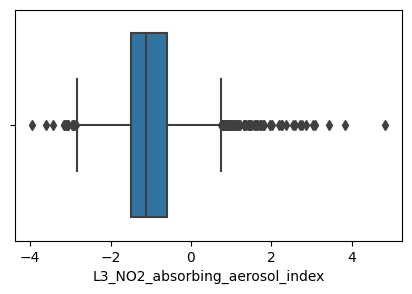

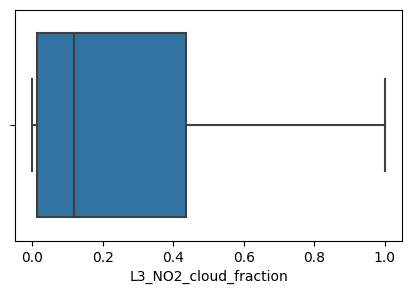

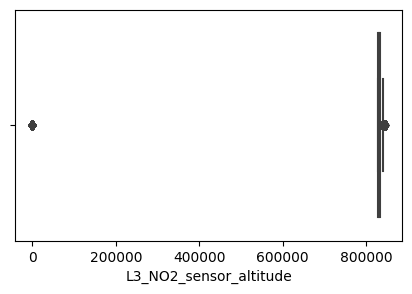

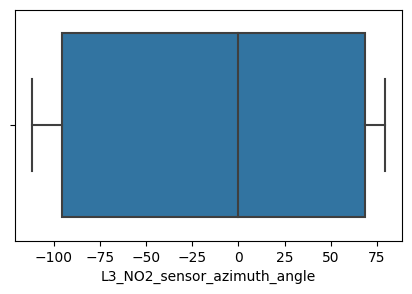

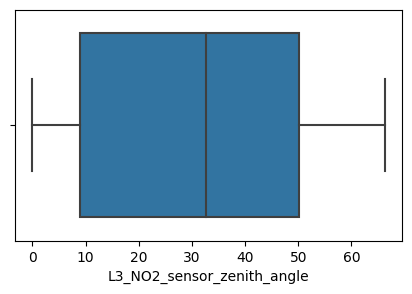

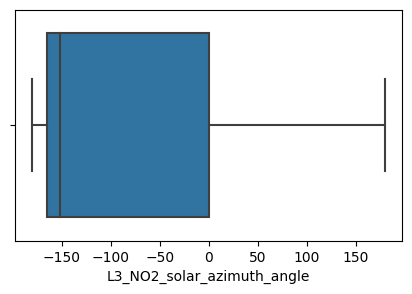

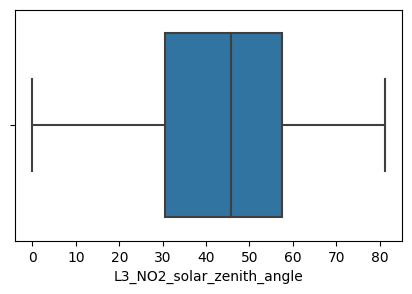

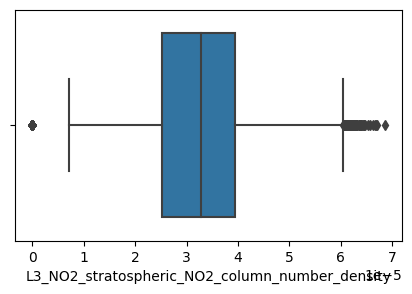

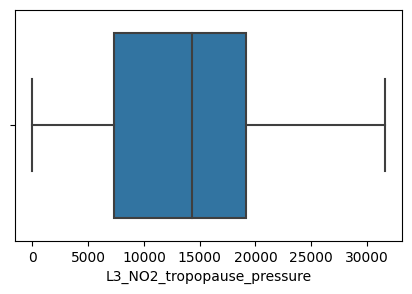

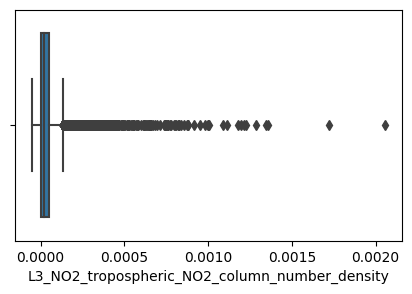

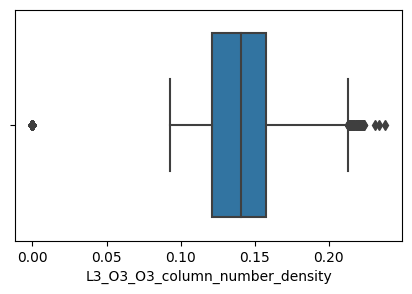

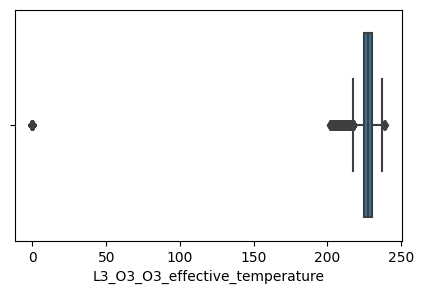

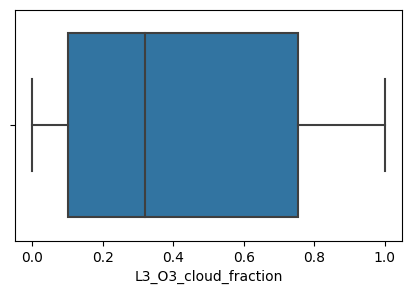

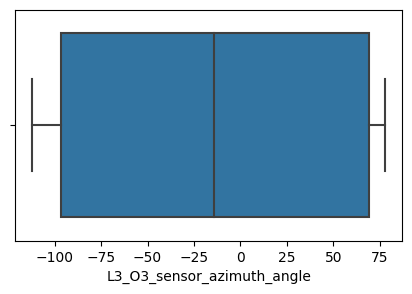

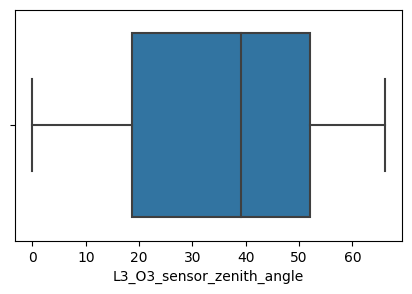

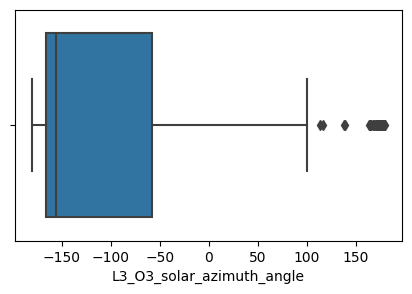

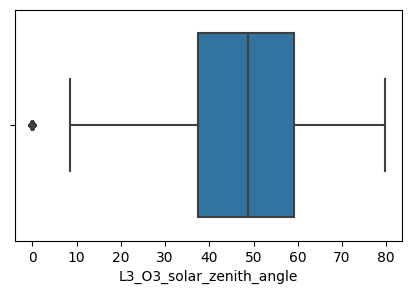

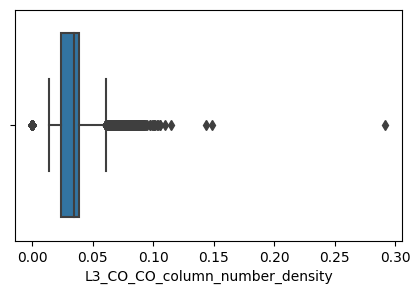

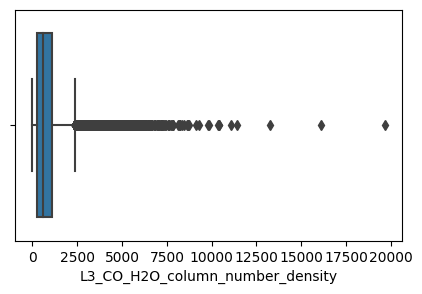

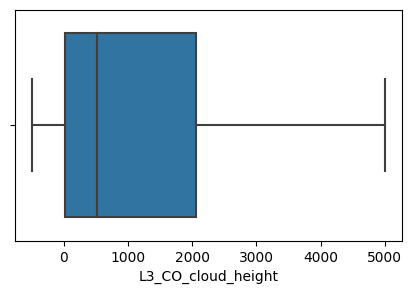

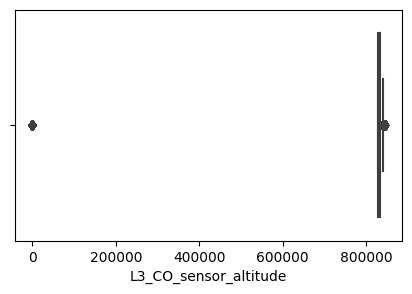

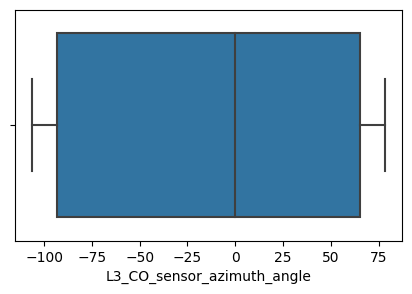

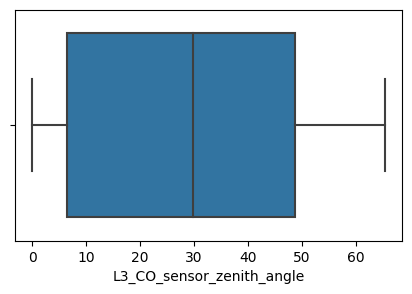

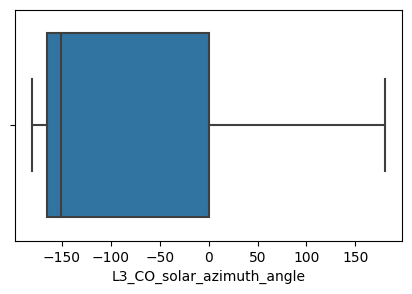

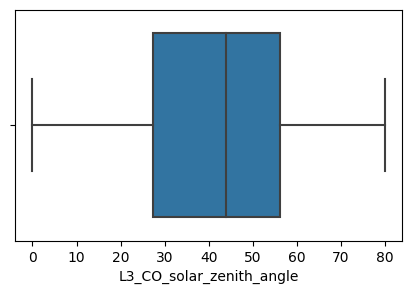

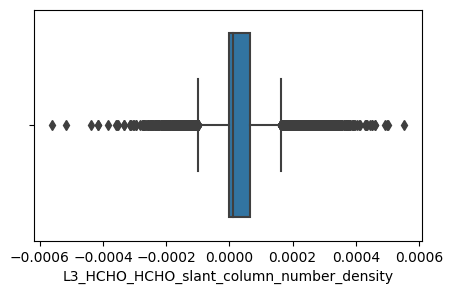

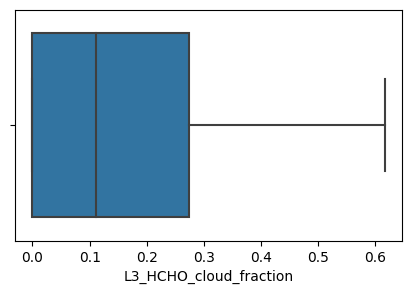

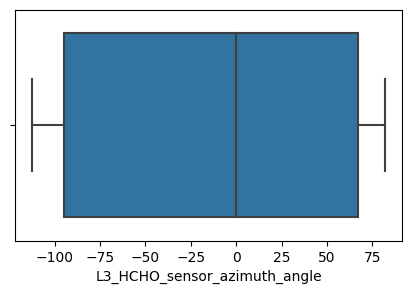

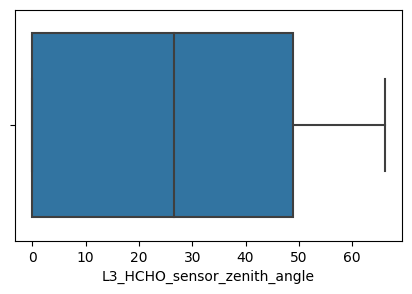

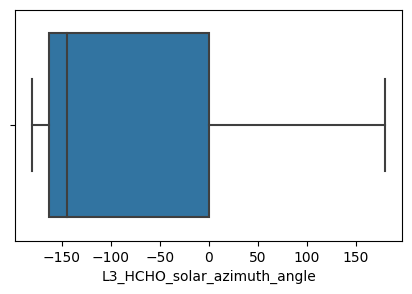

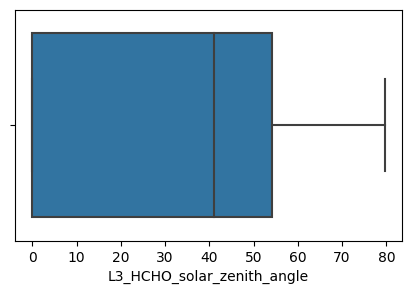

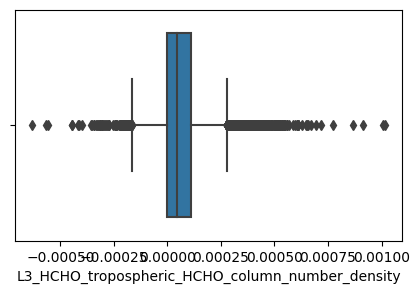

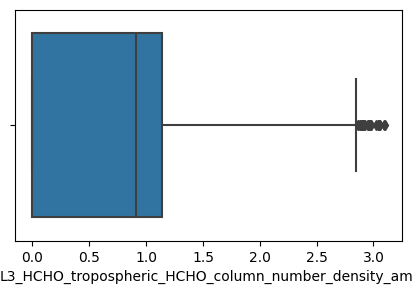

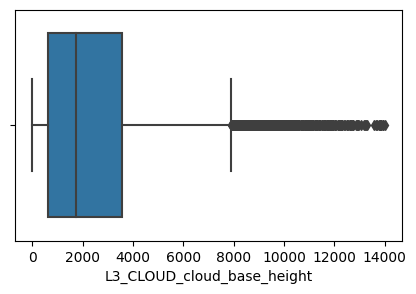

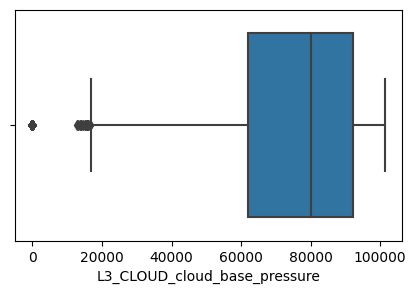

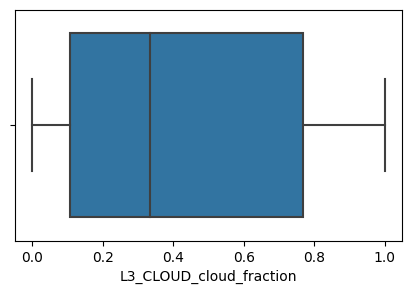

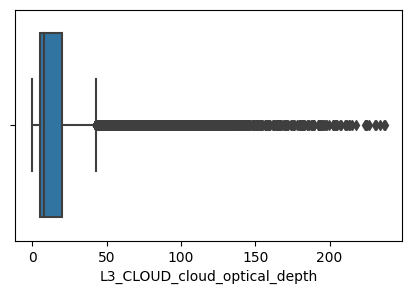

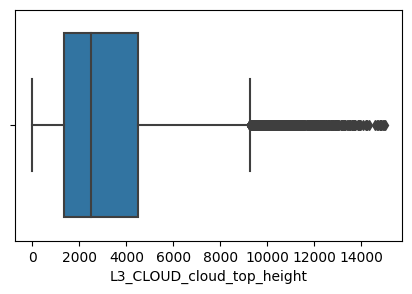

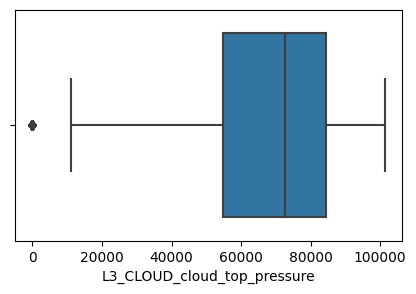

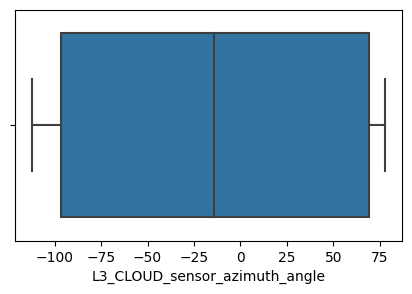

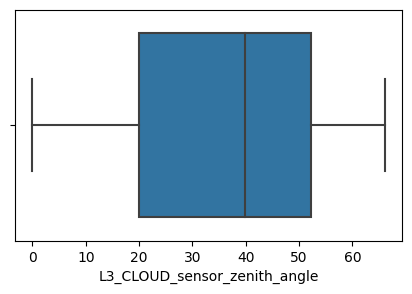

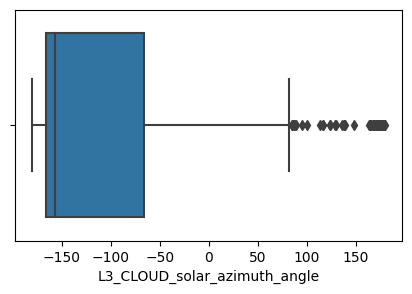

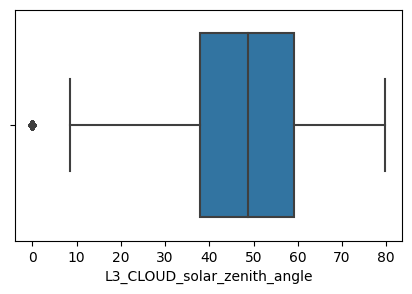

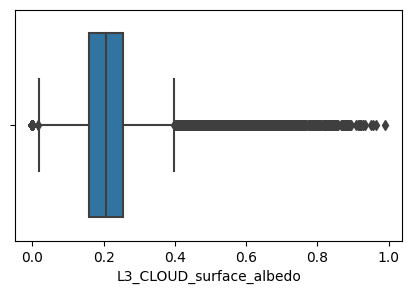

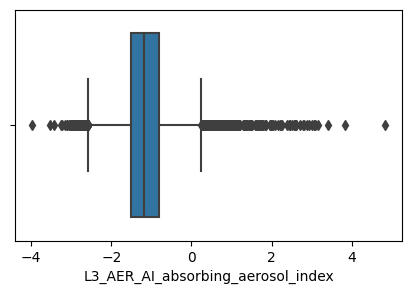

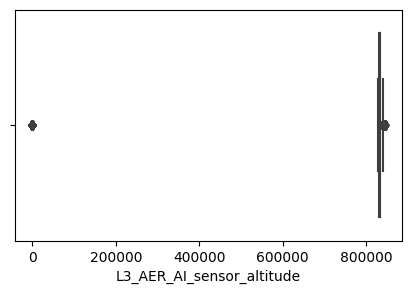

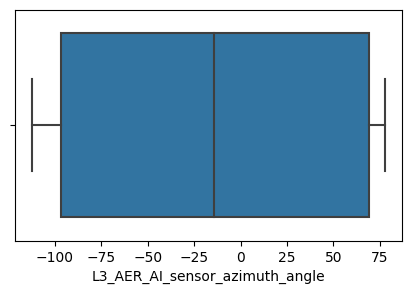

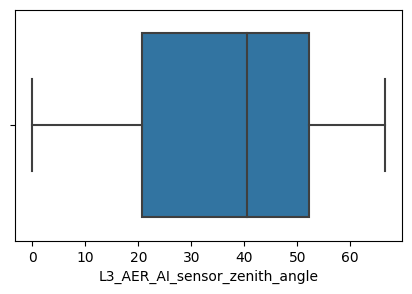

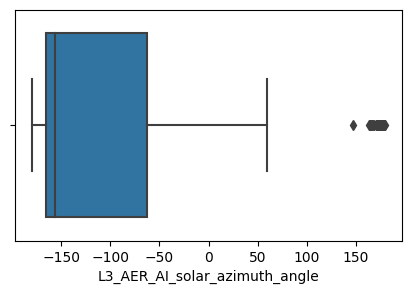

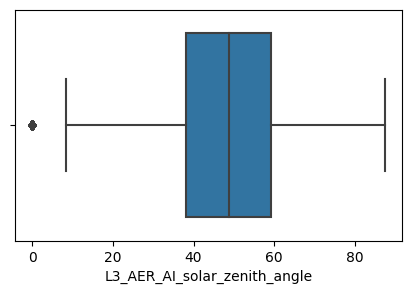

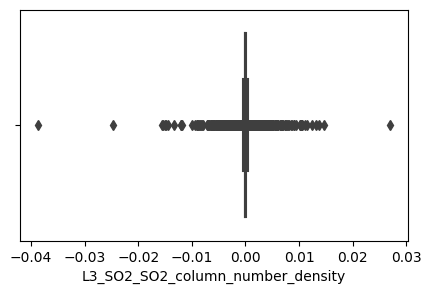

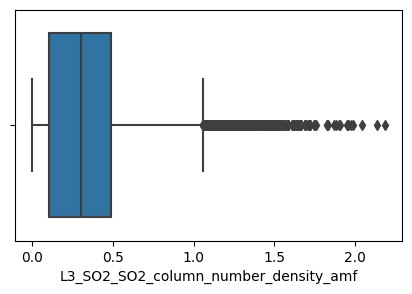

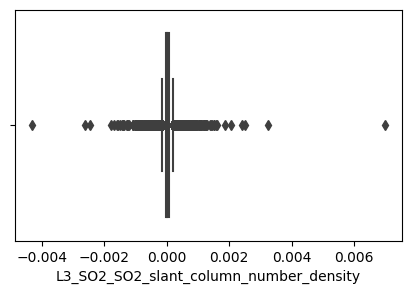

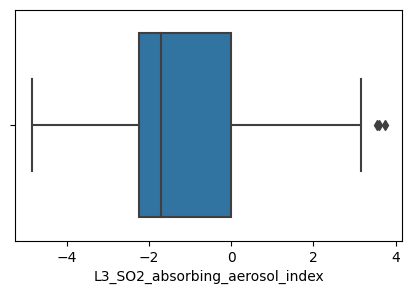

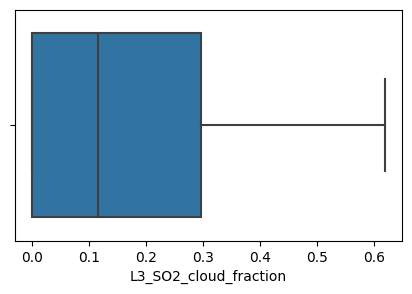

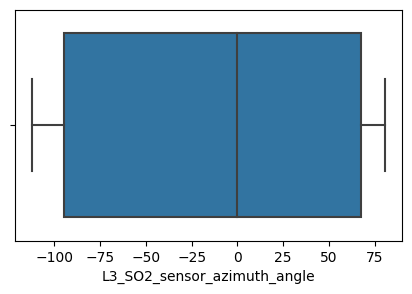

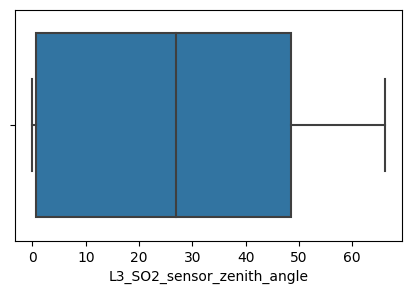

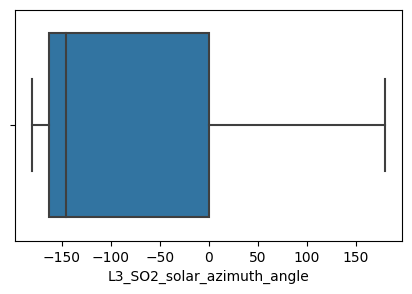

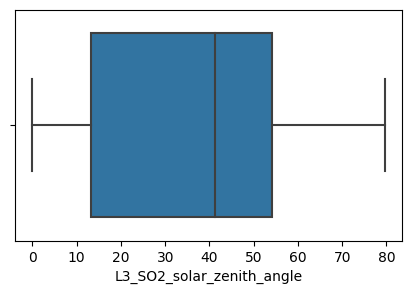

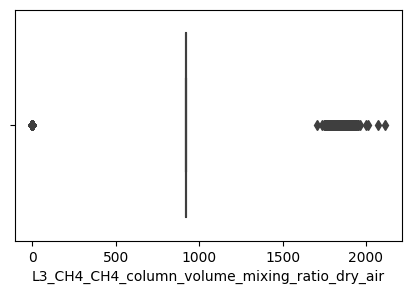

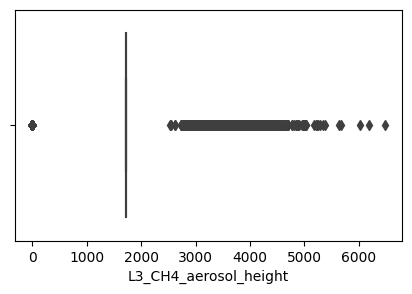

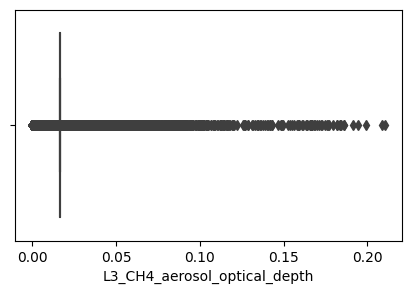

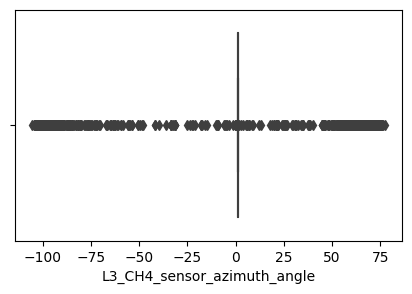

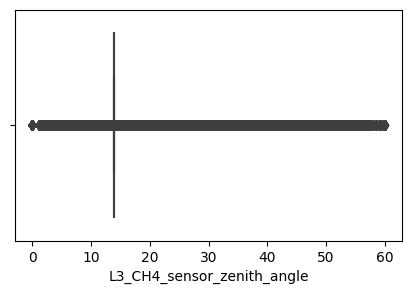

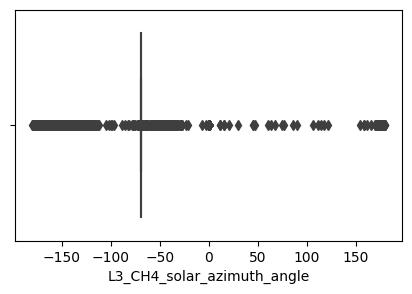

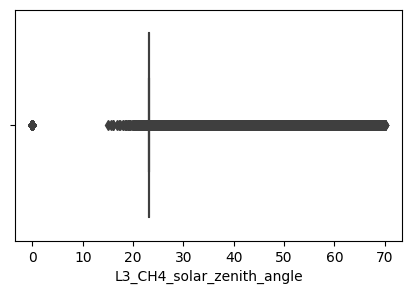

In [42]:
# Iterate over columns in the dataset
for col in dataset.columns:
    if dataset[col].dtypes == "int64":
        plt.figure(figsize=(5, 3))  # Set the figure size
        sns.boxplot(data=dataset, x=col)
        plt.show()
    if dataset[col].dtypes == "float64":
        plt.figure(figsize=(5, 3))  # Set the figure size
        sns.boxplot(data=dataset, x=col)
        plt.show()

#### Working with outliers
- We will keep the outliers since they happen to appear in the target and also in the columns we filled with 0

### Exploratory Analysis

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 81 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 30557 non-null  datetime64[ns]
 1   Place_ID                                             30557 non-null  float64       
 2   target                                               30557 non-null  float64       
 3   target_min                                           30557 non-null  float64       
 4   target_max                                           30557 non-null  float64       
 5   target_variance                                      30557 non-null  float64       
 6   target_count                                         30557 non-null  int64         
 7   precipitable_water_entire_atmosphere                 30557 non-null  float64       
 

Text(0, 0.5, 'daily mean concentration (Target)')

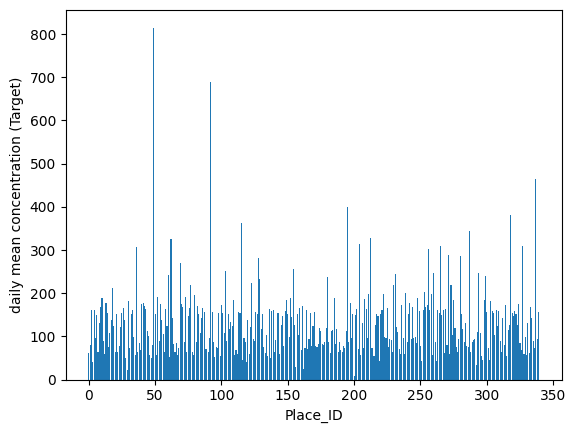

In [57]:
# Create a heatmap using seaborn
plt.bar(dataset["Place_ID"], dataset["target"])
plt.xlabel("Place_ID")
plt.ylabel("daily mean concentration (Target)")

Text(0, 0.5, 'daily mean concentration (Target)')

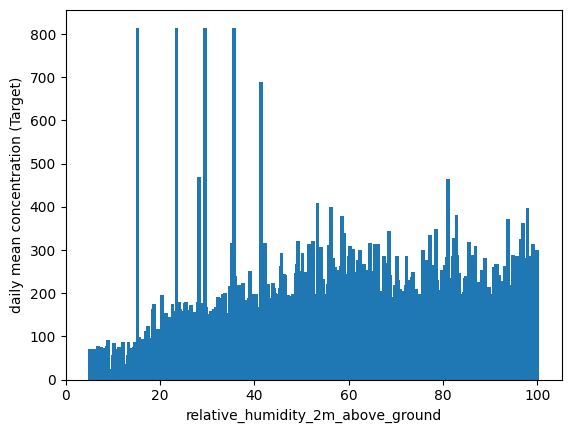

In [58]:
plt.bar(dataset["relative_humidity_2m_above_ground"], dataset["target"])
plt.xlabel("relative_humidity_2m_above_ground")
plt.ylabel("daily mean concentration (Target)")

Text(0, 0.5, 'daily mean concentration (Target)')

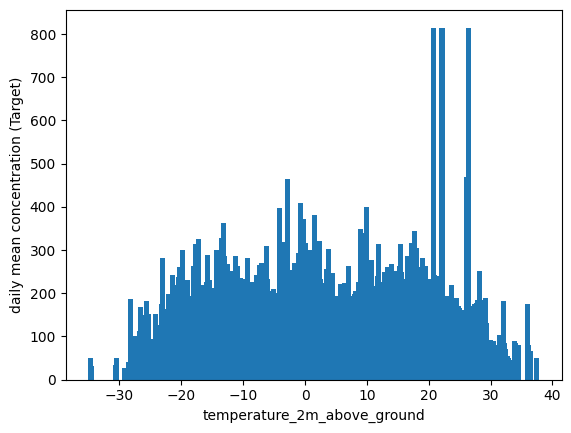

In [59]:
plt.bar(dataset["temperature_2m_above_ground"], dataset["target"])
plt.xlabel("temperature_2m_above_ground")
plt.ylabel("daily mean concentration (Target)")

Text(0, 0.5, 'daily mean concentration (Target)')

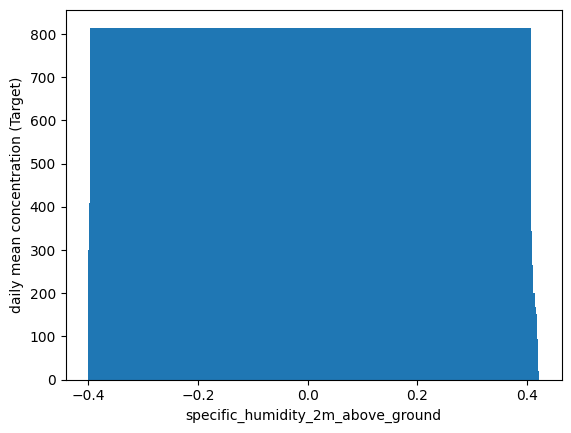

In [60]:
plt.bar(dataset["specific_humidity_2m_above_ground"], dataset["target"])
plt.xlabel("specific_humidity_2m_above_ground")
plt.ylabel("daily mean concentration (Target)")

Text(0, 0.5, 'daily mean concentration (Target)')

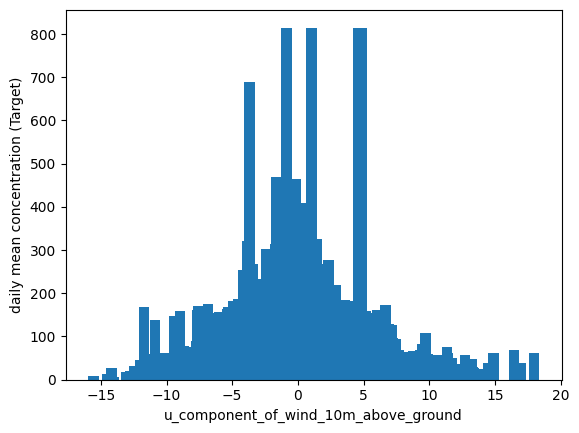

In [61]:
plt.bar(dataset["u_component_of_wind_10m_above_ground"], dataset["target"])
plt.xlabel("u_component_of_wind_10m_above_ground")
plt.ylabel("daily mean concentration (Target)")

Text(0, 0.5, 'daily mean concentration (Target)')

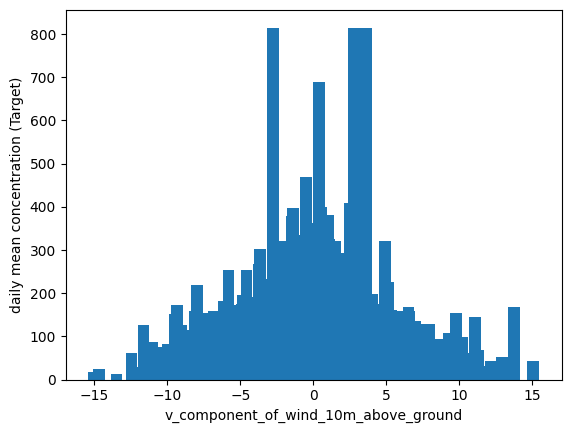

In [65]:
plt.bar(dataset["v_component_of_wind_10m_above_ground"], dataset["target"])
plt.xlabel("v_component_of_wind_10m_above_ground")
plt.ylabel("daily mean concentration (Target)")

Text(0.5, 0, 'daily mean concentration (Target)')

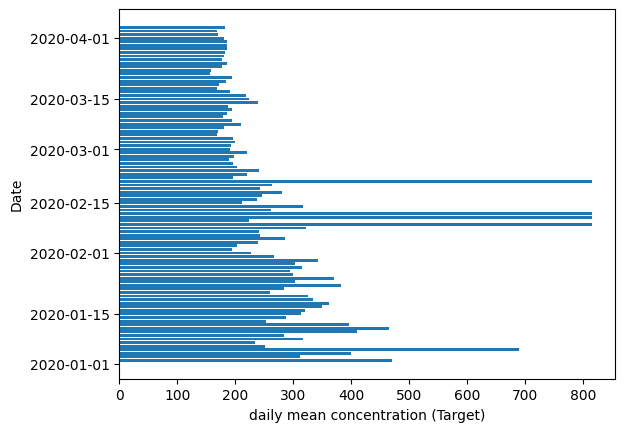

In [67]:
plt.barh(dataset["Date"], dataset["target"])
plt.ylabel("Date")
plt.xlabel("daily mean concentration (Target)")